### File to run poker experiments

###### Import the Poker Environment

In [16]:
from PokerEnv import *
import matplotlib.pyplot as plt

In [8]:
games = []
error=[]

###### Run 10000 games of poker with random emotions and random powers

In [9]:

for j in range(10000):
    players_list = []
    for i in range(8):
        p = Player()
        emotion = random.randint(0,5)
        power = random.random()
        a = Agent(p,1000,emotion,power)
        players_list.append(a)
    env = PokerEnvironment(players_list)
    env.reset()
    env.pre_flop()
    env.flop()
    env.turn()
    env.river()
    env.showdown()
    games.append(env.game_stats)
    try:
        c  = 1/len(env.game_stats['win_emotion'])
    except:
        print(j)
        error=players_list
        break

###### Calculate how many games each emotion won out of 10000 games

In [10]:
emotion_frequency = {'fear':0,'happy':0,'no-emotion':0,'anger':0,'contempt':0,'normal':0}

In [11]:
for i in range(len(games)):
    game_s = games[i]
    try:
        emotion_frequency[game_s['win_emotion']]+=1
    except:
        print(i)

###### We call it emotion frequency

In [12]:
emotion_frequency

{'fear': 1439,
 'happy': 2038,
 'no-emotion': 1361,
 'anger': 2289,
 'contempt': 1341,
 'normal': 1532}

###### Plot

In [13]:
x=['fear','happy','no-emotion','angry','contempt','normal']

In [14]:
y = [x[1] for x in emotion_frequency.items()]

<BarContainer object of 6 artists>

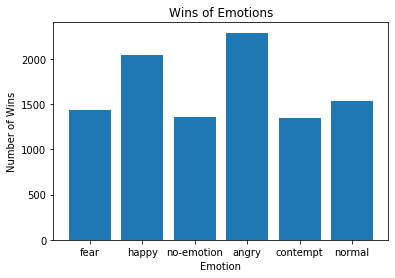

In [17]:
plt.title('Wins of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Number of Wins')
plt.bar(x,y)

###### Calculate average power of each winning emotion

In [18]:
power_frequency = {'fear':0,'happy':0,'no-emotion':0,'anger':0,'contempt':0,'normal':0}

In [19]:
for i in range(len(games)):
    game_s = games[i]
    try:  
        power_frequency[game_s['win_emotion']]+=game_s['win_e_power']
    except Exception as e:
        print(e)
        break
        

In [21]:
for i in power_frequency:
    power_frequency[i] /= emotion_frequency[i]

In [22]:
power_frequency

{'fear': 0.48609954272432515,
 'happy': 0.5472139978138693,
 'no-emotion': 0.4994156932296589,
 'anger': 0.5740032101035686,
 'contempt': 0.48382973640800697,
 'normal': 0.505259189087482}

###### Plot

In [23]:
x=['fear','happy','no-emotion','angry','contempt','normal']
y = [x[1] for x in power_frequency.items()]

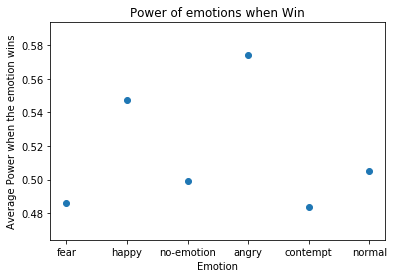

In [24]:
plt.title('Power of emotions when Win')
plt.xlabel('Emotion')
plt.ylabel('Average Power when the emotion wins')
plt.scatter(x,y)

###### Frequency of game endings for each turn

In [25]:
turn_frequency = {'pre_flop':0,'flop':0,'turn':0,'river':0,'showdown':0}

In [26]:
for i in range(len(games)):
    game_s = games[i]
    try:
        turn_frequency[game_s['last_round']]+=1   
    except Exception as e:
        print(e)
        break

In [27]:
turn_frequency

{'pre_flop': 880, 'flop': 675, 'turn': 655, 'river': 840, 'showdown': 6950}

In [28]:
x= ['pre_flop','flop','turn','river','showdown']
y = [x[1] for x in turn_frequency.items()]

<BarContainer object of 5 artists>

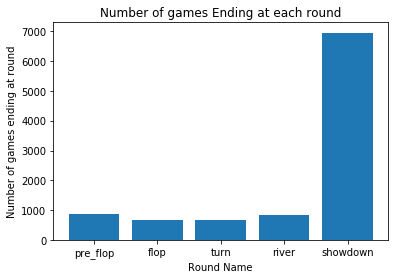

In [29]:
plt.title('Number of games Ending at each round')
plt.xlabel('Round Name')
plt.ylabel('Number of games ending at round')
plt.bar(x,y)

###### Calculate remaining coins at the end of each game for each winning emotion

In [30]:
debt_amount = {'fear':0,'happy':0,'no-emotion':0,'anger':0,'contempt':0,'normal':0}

In [31]:
for i in range(len(games)):
    game_s = games[i]
    try:
        debt_amount[game_s['win_emotion']]+=game_s['debt']
    except Exception as e:
        print(e)
        break
        

In [32]:
for i in debt_amount:
    debt_amount[i] /= emotion_frequency[i]

In [33]:
x=['fear','happy','no-emotion','angry','contempt','normal']
y = [x[1] for x in debt_amount.items()]

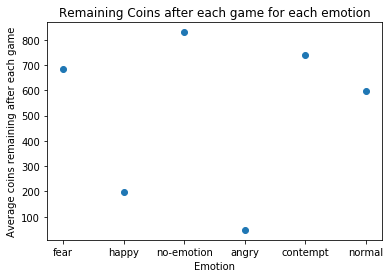

In [34]:
plt.title('Remaining Coins after each game for each emotion')
plt.xlabel('Emotion')
plt.ylabel('Average coins remaining after each game')
plt.scatter(x,y)

###### These results are discussed in the results section of the report